In [47]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [120]:
raw_data = pd.read_csv('/Users/Beba/Documents/JupyterNotebooks/epi_r.csv')

#list(raw_data.columns)

In [3]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

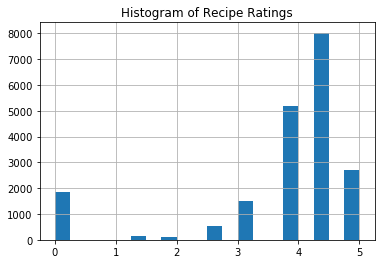

In [4]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [5]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [6]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

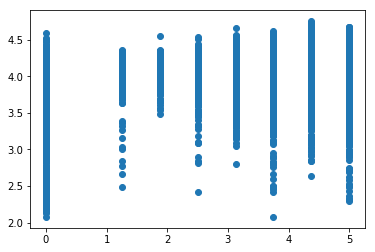

In [7]:
plt.scatter(Y, svr.predict(X))

In [8]:
len(list(raw_data.columns)) 

680

In [96]:
new_data = pd.DataFrame()

raw_rating = raw_data['rating']
bins = [0, 4, 6]
labels = ['low', 'high']

new_data['Rating_Category'] = pd.cut(raw_rating, bins=bins,labels=labels)


In [97]:
cleanup_nums = {'Rating_Category': {'low': 0, 'high': 1}}
new_data.replace(cleanup_nums, inplace=True)

In [102]:
Y = new_data['Rating_Category']
Y.fillna(value=0, axis=0, inplace=True)

In [170]:
pca = PCA(n_components=30)
new_X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(new_X, Y, test_size=0.33)

In [166]:
offset = int(X.shape[0] * 0.7)
X_train, y_train = new_Xdf[:offset], Y[:offset]
X_test, y_test = new_Xdf[offset:], Y[offset:]

In [132]:
from sklearn.svm import SVC
svc = SVC()

In [133]:
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.588506773857
0.579329102448


In [114]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, new_X, Y, cv=5)

array([ 0.57217651,  0.578908  ,  0.56569434,  0.58029925,  0.5727114 ])

In [123]:
cross_val_score(svc, X_train, y_train, cv=5)

array([ 0.58221726,  0.57722367,  0.57536286,  0.56291884,  0.57446016])

In [179]:
def build_model(model, X, y, kernel):
    setup_model=model(kernel=kernel)
    setup_model.fit(X, y)
    return setup_model

def score_model(y_true, y_pred):
    r_score = sklearn.metrics.r2_score(y_true, y_pred, multioutput='variance_weighted')
    accuracy = sklearn.metrics.accuracy_score(y_true, y_pred)
    print(r_score)
    print(accuracy)


In [151]:
y_pred = svc.predict(X_test)
score_model(y_test, y_pred)

-0.69106813354
0.579329102448


In [165]:
new_Xdf = pd.DataFrame(data=new_X)

In [181]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

def test_model(model, X, y, kernel):
    built_model = build_model(model, X, y, kernel)
    y_pred = built_model.predict(X)
    scores = score_model(y, y_pred)
    return scores

test_model(SVC, X_train, y_train, 'rbf')

-0.615478384518
0.598332588953


In [182]:
test_model(SVC, X_train, y_train, 'poly')

-0.848998239952
0.540270954295


In [183]:
for kernel in kernels:
    test_model(SVC, X_train, y_train, kernel)

-0.669666966356
0.584859312193
-0.848998239952
0.540270954295
-0.615478384518
0.598332588953
-0.685234956718
0.580988536549


ValueError: X.shape[0] should be equal to X.shape[1]

## The classifier doesn't work much better than a coin toss. 
